<h1>Uber EDA and Data Visualization</h1>

<img src="uber.png" />

<h2>What is Uber?</h2>

<p>Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.</p>

<p>I will use data regarding Uber ride</p>

<h3>Project Overview:</h3>

<ul>
    <li>Check how long do people travel with Uber?</li>
    <li>Check The Purpose Of Trips?</li>
    <li>Which Day Has The Highest Number Of Trips?</li>
    <li>What Month has the highest number of Trips?</li>
    <li>What category are the trips categorize in and which category has the most trips?</li>
    <li>Where Do People Start Boarding Their Trip From?</li>
</ul>

<h2>Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import calendar

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h1>1. Data Preparation</h1>

<h2>1.1 Loading the Data</h2>

In [2]:
Uber_data = pd.read_csv('Uber_Trips.csv')
Uber_data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

<h2>1.2 Summarise Data</h2>

In [3]:
Uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
Uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
Uber_data.shape

(1156, 7)

In [6]:
Uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


<h2>1.3 Cleaning the Data</h2>

In [7]:
# Checking if there are null values in the uber dataset
Uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
# Dropping all NaN values
Uber_data = Uber_data.dropna()

In [9]:
# Checking if all NaN values are dropped
Uber_data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [10]:
Uber_data.shape

(653, 7)

<h3>Extracting Weekday, Day, Month and Year from START_DATE</h3>

In [11]:
Uber_data['START_DATE*'] = pd.to_datetime(Uber_data['START_DATE*'], format="%m/%d/%Y %H:%M")

day=[]
dayofweek=[]
month_of_year = []
month=[]
weekday=[]
year= []

for x in Uber_data['START_DATE*']:
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    month_of_year.append(calendar.month_name[month[-1]])
    weekday.append(calendar.day_name[dayofweek[-1]])
    year.append(x.year)
Uber_data['DAY']=day
Uber_data['MONTH']=month_of_year
Uber_data['WEEKDAY']=weekday
Uber_data['YEAR'] = year


Month_dict = {1 : 'Jan'}

Uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DAY,MONTH,WEEKDAY,YEAR
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,January,Friday,2016
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2,January,Saturday,2016
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,5,January,Tuesday,2016
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,6,January,Wednesday,2016
5,2016-01-06 17:15:00,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,6,January,Wednesday,2016


<h1>2. Data Visualisation</h1>

<h3>2.1 How far do people travel with Uber?</h3>

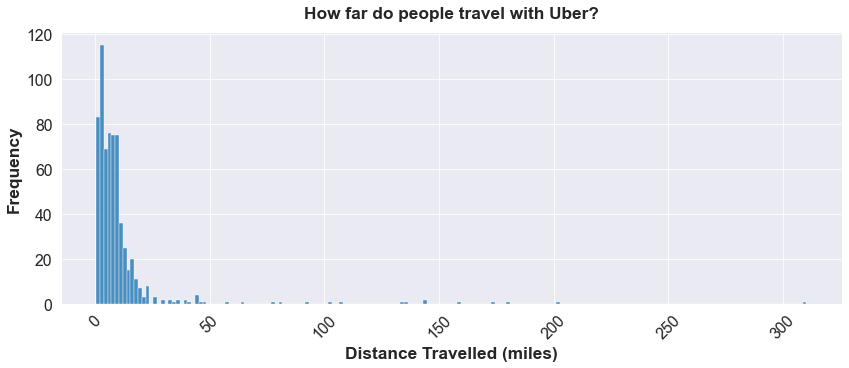

In [12]:
plt.figure(figsize=(14,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.8)
sns.histplot(Uber_data['MILES*'], alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('How far do people travel with Uber?', weight='bold', pad=14)
plt.xlabel('Distance Travelled (miles)', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.show()

<p><b>Analysis:</b> From the histogram plot it has shown that people normally travel a within a short distance.</p>

<h3>2.2 What is the customer purpose of trips with Uber?</h3>

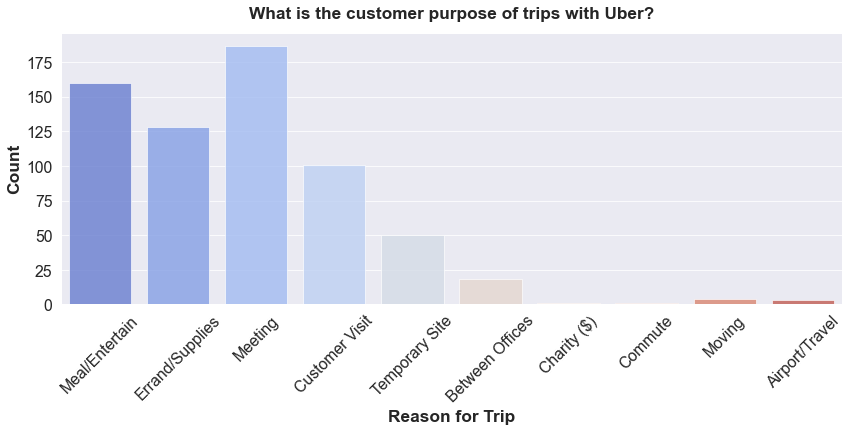

In [13]:
plt.figure(figsize=(14,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.8)
sns.countplot(x='PURPOSE*', data=Uber_data, alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('What is the customer purpose of trips with Uber?',  weight='bold', pad=14)
plt.xlabel('Reason for Trip', weight='bold')
plt.ylabel('Count',  weight='bold')
plt.show()

<p><b>Analysis:</b> From the bar chart it has shown that most of the people uses Uber for Meeting and Meal/Entertain.</p>

<h3>2.3 Which Day Has The Highest Number Of Trips?</h3>

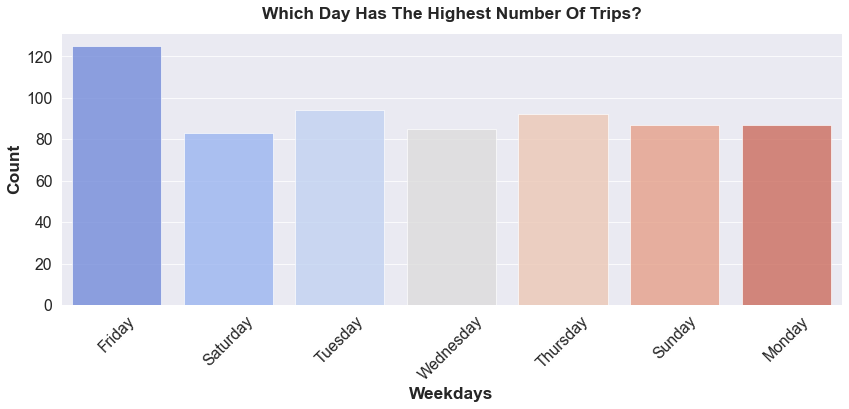

In [14]:
plt.figure(figsize=(14,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.8)
sns.countplot(x='WEEKDAY', data=Uber_data, alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Which Day Has The Highest Number Of Trips?',  weight='bold', pad=14)
plt.xlabel('Weekdays', weight='bold')
plt.ylabel('Count',  weight='bold')
plt.show()

<p><b>Analysis: </b>Friday has the highest number of trips during the week</p>

<h3>2.4 What Month has the highest number of Trips?</h3>

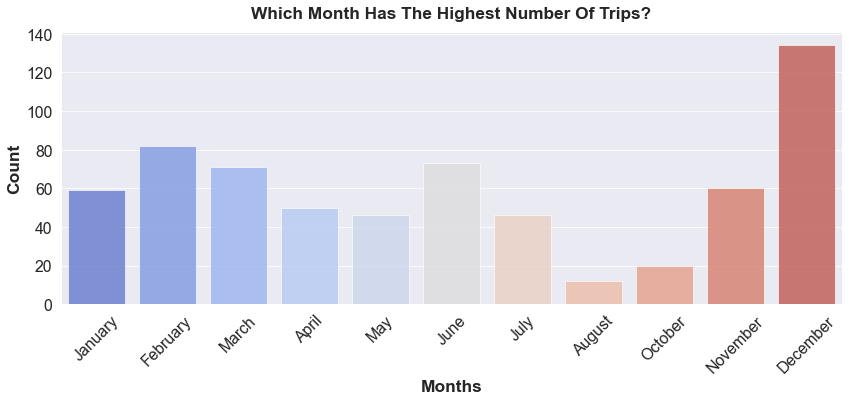

In [15]:
plt.figure(figsize=(14,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.8)
sns.countplot(x='MONTH', data=Uber_data, alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('Which Month Has The Highest Number Of Trips?',  weight='bold', pad=14)
plt.xlabel('Months', weight='bold')
plt.ylabel('Count',  weight='bold')
plt.show()

<p><b>Analysis:</b> The month of December had the highest number of trips made</p>

<h3>2.5 What category are the trips categorize in and which category has the most trips?</h3>

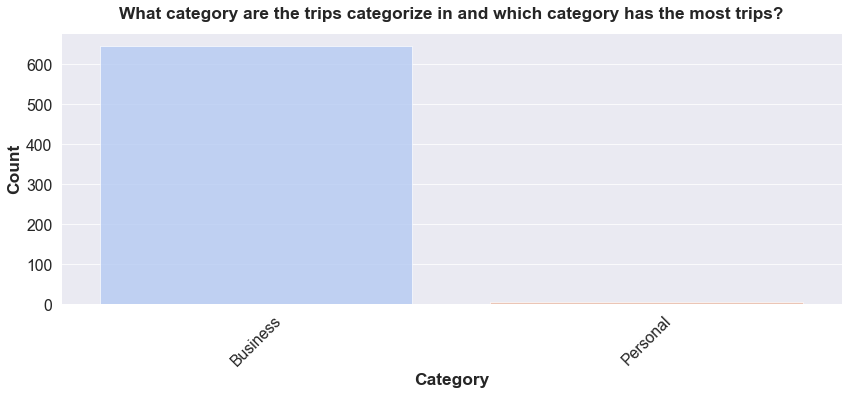

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

In [16]:
plt.figure(figsize=(14,5))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.8)
sns.countplot(x='CATEGORY*', data=Uber_data, alpha=0.8, palette = 'coolwarm')
plt.xticks(rotation=45)
plt.title('What category are the trips categorize in and which category has the most trips?',  weight='bold', pad=14)
plt.xlabel('Category', weight='bold')
plt.ylabel('Count',  weight='bold')
plt.show()

Uber_data['CATEGORY*'].value_counts()

<p><b>Analysis:</b> The category of the Uber trips are either Business or Personal and currently the plot shown above most of the trips are business related.</p>


<h3>2.6 Where Do People Start Boarding Their Trip From?</h3>

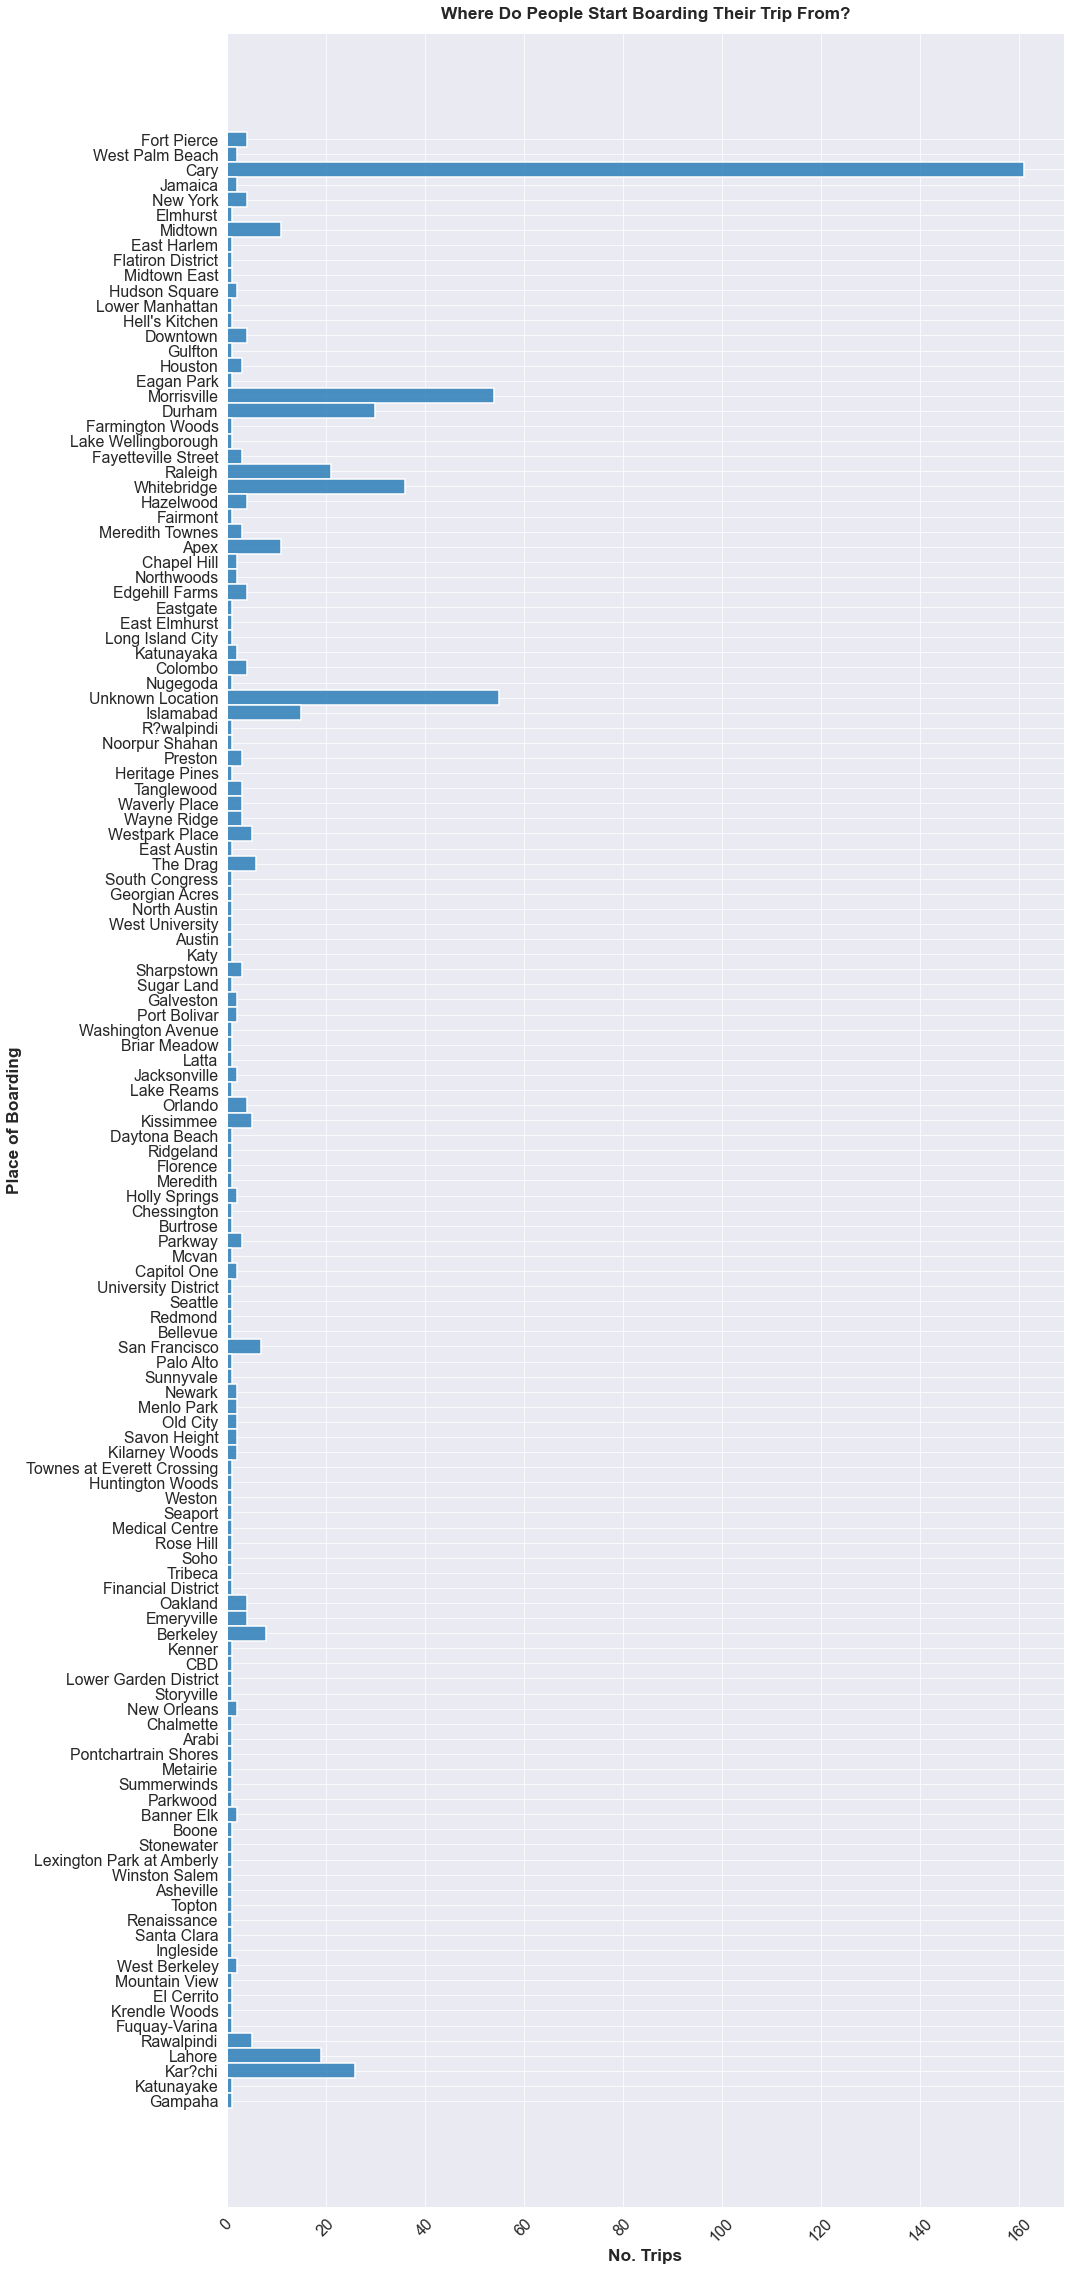

In [17]:
plt.figure(figsize=(15, 40))
sns.set_style("darkgrid")
sns.set_context('paper', font_scale = 1.8)
sns.histplot(y='START*', data=Uber_data, alpha=0.8, palette = 'dark')
plt.xticks(rotation=45)
plt.title('Where Do People Start Boarding Their Trip From?',  weight='bold', pad=14)
plt.xlabel('No. Trips', weight='bold')
plt.ylabel('Place of Boarding',  weight='bold')
plt.show()

In [18]:
count_of_boarding_place = Uber_data['START*'].value_counts()
display_df = pd.DataFrame(count_of_boarding_place, columns=['START*'])
display_df = display_df.rename(columns={"START*": "No. Trips"})

# Display the first 20 places
display_df.head(20)

,No. Trips
Cary,161
Unknown Location,55
Morrisville,54
Whitebridge,36
Durham,30
Kar?chi,26
Raleigh,21
Lahore,19
Islamabad,15
Apex,11


<p><b>Analysis: </b> The place that has the highest rate of boarding is Cary</p>